In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

## Lab 3: Pandas Overview

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**This lab is due Tuesday, June 30 at 11:59 PM.**

[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will learn commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating dataframes
* Slicing data frames (i.e. selecting rows and columns)
* Filtering data (using boolean arrays)

In this lab you are going to use several pandas methods, such as `drop` and `loc`. You may press `shift+tab` on the method parameters to see the documentation for that method. If you are familar with the `datascience` library used in Data 8, this [conversion notebook](https://github.com/data-8/materials-x19/blob/master/reference/Datascience%20to%20Pandas%20Conversion%20Notebook.ipynb) may serve as a useful guide.


**Note**: The Pandas interface is notoriously confusing, and the documentation is not consistently great. Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Creating DataFrames & Basic Manipulations

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a table in which each column has a type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

The [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) for the pandas `DataFrame` class  provide at least two syntaxes to create a data frame.

**Syntax 1: ** You can create a data frame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [4]:
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


**Syntax 2: ** You can also define a dataframe by specifying the rows like below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [5]:
fruit_info2 = pd.DataFrame(
    [("red", "apple"), ("orange", "orange"), ("yellow", "banana"),
     ("pink", "raspberry")], 
    columns = ["color", "fruit"])
fruit_info2

,color,fruit
0,red,apple
1,orange,orange
2,yellow,banana
3,pink,raspberry


You can obtain the dimensions of a dataframe by using the shape attribute `dataframe.shape`.

In [6]:
fruit_info.shape

(4, 2)

You can also convert the entire dataframe into a two-dimensional numpy array.

In [7]:
fruit_info.values

array([['apple', 'red'],
       ['orange', 'orange'],
       ['banana', 'yellow'],
       ['raspberry', 'pink']], dtype=object)

### Question 1(a)

For a DataFrame `d`, you can add a column with `d['new column name'] = ...` and assign a list or array of values to the column. Add a column of integers containing 1, 2, 3, and 4 called `rank1` to the `fruit_info` table which expresses your personal preference about the taste ordering for each fruit (1 is tastiest; 4 is least tasty). 

<!--
BEGIN QUESTION
name: q1a
-->

In [8]:
fruit_info['rank1'] = [2, 3, 4, 1] 
fruit_info

,fruit,color,rank1
0,apple,red,2
1,orange,orange,3
2,banana,yellow,4
3,raspberry,pink,1


In [9]:
grader.check("q1a")

All tests passed!

### Question 1(b)

You can also add a column to `d` with `d.loc[:, 'new column name'] = ...`. As discussed in lecture, the first parameter is for the rows and second is for columns. The `:` means change all rows and the `new column name` indicates the column you are modifying (or in this case, adding). 

Add a column called `rank2` to the `fruit_info` table which contains the same values in the same order as the `rank1` column.

<!--
BEGIN QUESTION
name: q1b
-->

In [10]:
fruit_info.loc[:, 'rank2'] = [2, 3, 4, 1]
fruit_info

,fruit,color,rank1,rank2
0,apple,red,2,2
1,orange,orange,3,3
2,banana,yellow,4,4
3,raspberry,pink,1,1


In [11]:
grader.check("q1b")

All tests passed!

### Question 2

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) both the `rank1` and `rank2` columns you created. (Make sure to use the `axis` parameter correctly.) Note that `drop` does not change a table, but instead returns a new table with fewer columns or rows unless you set the optional `inplace` parameter.

*Hint*: Look through the documentation to see how you can drop multiple columns of a Pandas dataframe at once using a list of column names.

<!--
BEGIN QUESTION
name: q2
-->

In [13]:
fruit_info_original = fruit_info.drop(['rank1', 'rank2'], axis = 1)
fruit_info_original

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [14]:
grader.check("q2")

All tests passed!

### Question 3

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) the columns of `fruit_info_original` so they begin with capital letters. Set this new dataframe to `fruit_info_caps`.
<!--
BEGIN QUESTION
name: q3
-->

In [15]:
fruit_info_caps = fruit_info_original.rename(columns={"fruit": "Fruit", "color": "Color"})
#fruit_info_original.rename(str.capitalize, axis = 'columns')
fruit_info_caps

,Fruit,Color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [16]:
grader.check("q3")

All tests passed!

### Babyname dataset
Now that we have learned the basics, let's move on to the babynames dataset. The babynames dataset contains a record of the given names of babies born in the United States each year.

First let's run the following cells to build the dataframe `baby_names`.
The cells below download the data from the web and extract the data into a dataframe. There should be a total of 6028151 records.

### `fetch_and_cache` Helper

The following function downloads and caches data in the `data/` directory and returns the `Path` to the downloaded file. The cell below the function describes how it works. 

In [3]:
import requests
from pathlib import Path

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path to the file.
    """
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        created = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded at", created)
    return file_path

In Python, a `Path` object represents the filesystem paths to files (and other resources). The `pathlib` module is effective for writing code that works on different operating systems and filesystems. 

To check if a file exists at a path, use `.exists()`. To create a directory for a path, use `.mkdir()`. To remove a file that might be a [symbolic link](https://en.wikipedia.org/wiki/Symbolic_link), use `.unlink()`. 

This function creates a path to a directory that will contain data files. It ensures that the directory exists (which is required to write files in that directory), then proceeds to download the file based on its URL.

The benefit of this function is that not only can you force when you want a new file to be downloaded using the `force` parameter, but in cases when you don't need the file to be re-downloaded, you can use the cached version and save download time.

Below we use `fetch_and_cache` to download the `namesbystate.zip` zip file, which is a compressed directory of CSV files. 

**This might take a little while! Consider stretching.**

In [4]:
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')

Using cached version downloaded at Tue Jun 30 13:10:37 2020


*Optional Hacking Challenge:* Use the `zipfile` module, `pd.read_csv`, and `pd.concat` to build a single dateframe called `baby_names` containing all of the data from each state with the `column_labels` below. A `ZipFile` object has an attribute `filelist` and a method `open`. Each `.TXT` file inside `namesbystate.zip` is a CSV file for the names of babies born in one state.

This task is pretty tricky, especially if you haven't taken 61A. Feel free to scroll down and use the cell where we've done it for you.

In [5]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

...

Ellipsis

The following cell builds the final full `baby_names` DataFrame. It first builds one dataframe per state, because that's how the data are stored in the zip file. Here is documentation for [pd.concat](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.concat.html) if you want to know more about its functionality. 

In [6]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=column_labels)

states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = states[0]
for state_df in states[1:]:
    baby_names = pd.concat([baby_names, state_df])
baby_names = baby_names.reset_index().iloc[:, 1:]

In [21]:
len(baby_names)

6028151

In [22]:
baby_names.head()
max_votes = baby_names.groupby("Year")["Count"].transform(max)
max_votes.to_frame().head(8)

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


## Slicing Data Frames - selecting rows and columns


### Selection Using Label/Index (using loc)

**Column Selection** 

To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). General usage of `.loc` looks like `df.loc[rowname, colname]`. (Reminder that the colon `:` means "everything.")  For example, if we want the `color` column of the `ex` data frame, we would use: `ex.loc[:, 'color']`

- You can also slice across columns. For example, `baby_names.loc[:, 'Name':]` would select the column `Name` and all columns after `Name`.

- *Alternative:* While `.loc` is invaluable when writing production code, it may be a little too verbose for interactive use. One recommended alternative is the `[]` method, which takes on the form `df['colname']`.

**Row Selection**

Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [23]:
#Example:
baby_names.loc[2:5, 'Name']

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [24]:
#Example:  Notice the difference between these two methods
#Just passing in 'Name' returns a Series while ['Name'] returns a Dataframe
baby_names.loc[2:5, ['Name']]

,Name
2,Anna
3,Margaret
4,Helen
5,Elsie


The `.loc` actually uses the Pandas row index rather than row id/position of rows in the dataframe to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. 


### Selection using Integer location (using iloc)

In lecture we discussed another pandas feature `iloc[]` which lets you slice the dataframe by row position and column position instead of by row index and column label (which is the case for `loc[]`). This is really the main difference between the 2 functions and it is **important** that you remember the difference and why you might want to use one over the other. In addition, with `iloc[]`, the end index is NOT included, like with normal Python slicing.

As a mnemonic, remember that the i in `iloc` means "integer". 

Below, we have sorted the `baby_names` dataframe. Notice how the *position* of a row is not necessarily equal to the *index* of a row. For example, the first row is not necessarily the row associated with index 1. This distinction is important in understanding the different between `loc[]` and `iloc[]`.

In [26]:
sorted_baby_names = baby_names.sort_values(by=['Name'])
sorted_baby_names.head()

,State,Sex,Year,Name,Count
4116672,NY,M,2013,Aaban,6
4118755,NY,M,2014,Aaban,6
730477,CA,M,2008,Aadan,7
748471,CA,M,2014,Aadan,5
5392325,TX,M,2008,Aadan,5


Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `Name` column of the `baby_names` dataframe using both `iloc[]` and `loc[]`. Observe the difference, especially after sorting `baby_names` by name.

In [27]:
sorted_baby_names.iloc[1:4, 3]

4118755    Aaban
730477     Aadan
748471     Aadan
Name: Name, dtype: object

Notice that using `loc[]` with 1:4 gives different results, since it selects using the *index*.

In [28]:
sorted_baby_names.loc[1:4, "Name"]

1          Annie
2141623    Annie
65626      Annie
5940084    Annie
2474948    Annie
           ...  
1524359    Helen
5846263    Helen
264296     Helen
2598349    Helen
4          Helen
Name: Name, Length: 2042507, dtype: object

Lastly, we can change the index of a dataframe using the `set_index` method.

In [30]:
#Example: We change the index from 0,1,2... to the Name column
df = baby_names[:5].set_index("Name")
df

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Annie,AK,F,1910,12
Anna,AK,F,1910,10
Margaret,AK,F,1910,8
Helen,AK,F,1910,7


We can now lookup rows by name directly:

In [31]:
df.loc[['Mary', 'Anna'], :]

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Anna,AK,F,1910,10


However, if we still want to access rows by location we will need to use the integer loc (`iloc`) accessor:

In [32]:
#Example: 
#df.loc[2:5,"Year"] You can't do this
df.iloc[1:4, 2:3]

,Year
Name,
Annie,1910
Anna,1910
Margaret,1910


### Question 4

Selecting multiple columns is easy.  You just need to supply a list of column names.  Select the `Name` and `Year` **in that order** from the `baby_names` table.

<!--
BEGIN QUESTION
name: q4
-->

In [33]:
name_and_year = baby_names.loc[:, ['Name', 'Year']]
name_and_year[:5]

,Name,Year
0,Mary,1910
1,Annie,1910
2,Anna,1910
3,Margaret,1910
4,Helen,1910


In [34]:
grader.check("q4")

All tests passed!

Note that `.loc[]` can be used to re-order the columns within a dataframe.

## Filtering Data

### Filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, for culling out fishy outliers, or for analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df['column name'] < 5]]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
>=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only names registered in California

In [35]:
ca = baby_names[baby_names['State'] == 'CA']

### Question 5
Using a boolean array, select the names in Year 2000 (from `baby_names`) that have larger than 3000 counts. Keep all columns from the original `baby_names` dataframe.

Note: Any time you use `p & q` to filter the dataframe, make sure to use `df[(df[p]) & (df[q])]` or `df.loc[(df[p]) & (df[q])]`. That is, make sure to wrap conditions with parentheses.

**Remember** that both slicing and `loc` will achieve the same result, it is just that `loc` is typically faster in production. You are free to use whichever one you would like.

<!--
BEGIN QUESTION
name: q5
-->

In [36]:
result = baby_names.loc[(baby_names['Year'] == 2000) & (baby_names['Count'] > 3000)]
result.head()

,State,Sex,Year,Name,Count
706923,CA,M,2000,Daniel,4341
706924,CA,M,2000,Anthony,3838
706925,CA,M,2000,Jose,3803
706926,CA,M,2000,Andrew,3600
706927,CA,M,2000,Michael,3572


In [37]:
grader.check("q5")

All tests passed!

Optionally, repeat the exercise from above, but this time using the `query` command from lecture.

In [38]:
result_using_query = baby_names.query('Year == 2000 & Count > 3000')
result_using_query.head()

,State,Sex,Year,Name,Count
706923,CA,M,2000,Daniel,4341
706924,CA,M,2000,Anthony,3838
706925,CA,M,2000,Jose,3803
706926,CA,M,2000,Andrew,3600
706927,CA,M,2000,Michael,3572


### Question 6

Some names gain/lose popularity because of cultural phenomena such as a political figure coming to power. Below, we plot the popularity of the female name Hillary in Calfiornia over time. What do you notice about this plot? What might be the cause of the steep drop?

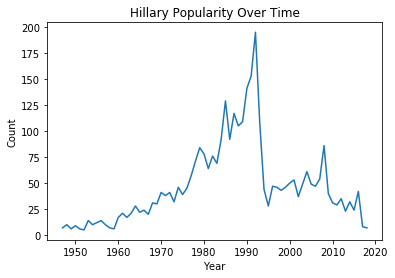

In [39]:
hillary_baby_name = baby_names[(baby_names['Name'] == 'Hillary') & (baby_names['State'] == 'CA') & (baby_names['Sex'] == 'F')]
plt.plot(hillary_baby_name['Year'], hillary_baby_name['Count'])
plt.title("Hillary Popularity Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

The name increases in popularity up until 1990 and then takes a steep drop at around 1990; popularity also decreases around 1008 and 2016. 1993 is when Bill Clinton got elected (Hillary became the first lady) and Hillary ran for president during the 2008/2016 elections. Perhaps, increased involvement in politics decreases the popularity of a name.

Optional: Below, we see code that aggregates across all 50 states. Try other names, including world leaders. 

For the curious: The syntax here is more advanced than before, but all of it was covered in lecture 5, with the exception of `reset_index` and the usage of `@name_of_interest`. `reset_index` changes the index into a sequence of numbers from 0 to N - 1. `@name_of_interest` inside the query argument tells `query` to use the Python variable called `name_of_interest`. Also, the title is generated using [Python f-strings](https://realpython.com/python-f-strings/).

In [1]:
counts_aggregated_by_name_and_year = baby_names.groupby(["Name", "Year"]).sum()
counts_aggregated_by_name_and_year

NameError: name 'baby_names' is not defined

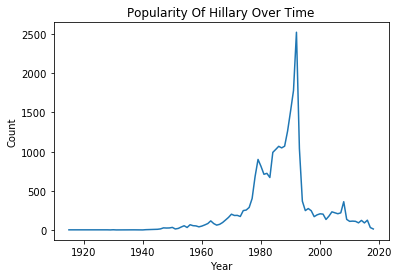

In [37]:
name_of_interest = 'Hillary'
chosen_baby_name = counts_aggregated_by_name_and_year.query("Name == @name_of_interest")
plt.plot(chosen_baby_name['Year'], chosen_baby_name['Count'])
plt.title(f"Popularity Of {name_of_interest} Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [38]:
grader.check_all()

q1a:

    All tests passed!
    

q1b:

    All tests passed!
    

q2:

    All tests passed!
    

q3:

    All tests passed!
    

q4:

    All tests passed!
    

q5:

    All tests passed!

## Submission

Make sure you have run all cells in your notebook in order before     running the cell below, so that all images/graphs appear in the output. The cell below will generate     a zipfile for you to submit. **Please save before exporting!**

In [39]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)

<IPython.core.display.Javascript object>